# CHATBOTS - Using Natural Language Processing and Tensorflow

In [1]:
#Used in Tensorflow Model
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import tflearn
import random

#Usde to for Contextualisation and Other NLP Tasks.
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

#Other
import json
import pickle
import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
import nltk
from nltk.stem import SnowballStemmer
nltk.download(['stopwords'])

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\psund\anaconda3\envs\qwerty\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print("Processing the Intents.....")
with open('intents.json') as json_data:
    intents = json.load(json_data)

Processing the Intents.....


In [4]:
words = []
classes = []
documents = []
ignore_words = ['?', '_', '!', '-']
print("Looping through the Intents to Convert them to words, classes, documents and ignore_words.......")
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

Looping through the Intents to Convert them to words, classes, documents and ignore_words.......


In [5]:
print("Stemming, Lowering and Removing Duplicates.......")
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

Stemming, Lowering and Removing Duplicates.......
292 documents
97 classes ['academic_advising', 'academics_majors', 'academics_reputation', 'accessibility', 'admission', 'admission_requirements', 'alumni_association', 'arts_humanities', 'athletics_sports', 'business_social_sciences', 'campus_diversity', 'campus_facilities', 'campus_navigation', 'campus_wifi', 'career_services', 'career_services_internships', 'class_format', 'class_size', 'co-op_program', 'collaborative_work', 'complaints', 'computer_labs', 'contact', 'courses', 'creator', 'dorm_quality', 'eco_friendly_housing', 'employer_recruitment', 'events', 'facilities', 'farewell', 'favorite_class', 'favorite_place_on_campus', 'fees', 'fellow_students', 'financial_aid', 'first_choice_classes', 'first_year_experience', 'food', 'fraternities_sororities', 'friendly_students', 'greeting', 'hands-on_experiences', 'happiness', 'healthcare_facilities', 'healthcare_pre_professional', 'hometown_activities', 'hostel', 'hours', 'housing_din

In [6]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print("Removing unnecessary spaces, special symbols, numbers, and stopwords")
words = [re.sub(r'[^a-zA-Z]', ' ', w).strip() for w in words if w.lower() not in stop_words]
words = sorted(list(set(filter(None, words))))
words = [word for word in words if not any(char.isdigit() for char in word)]
classes = sorted(list(set(classes)))
print(len(words), "words obtained after unnecessary things")
print("words are",words)
print(classes)
print(documents)

Removing unnecessary spaces, special symbols, numbers, and stopwords
358 words obtained after unnecessary things
words are ['abl', 'abroad', 'academ', 'access', 'act', 'address', 'admin', 'admit', 'adv', 'aid', 'alumn', 'among', 'anyth', 'apart', 'apply', 'ar', 'area', 'around', 'art', 'assign', 'assist', 'assocy', 'athlet', 'attend', 'attract', 'auth', 'av', 'avail', 'background', 'belong', 'best', 'big', 'body', 'branch', 'build', 'busy', 'bye', 'cal', 'camp', 'capston', 'car', 'cent', 'chat', 'cho', 'choos', 'class', 'classroom', 'cliqu', 'club', 'co op', 'collab', 'colleg', 'comfort', 'commun', 'complaint', 'complex', 'comput', 'connect', 'contact', 'coop', 'could', 'counsel', 'country', 'cours', 'cov', 'cre', 'criter', 'cross cultural', 'culmin', 'cult', 'cur', 'dai', 'dat', 'day', 'decid', 'depart', 'describ', 'desir', 'develop', 'diff', 'din', 'discussion based', 'divers', 'doe', 'dorm', 'dormit', 'easy', 'eco friendly', 'econom', 'educ', 'effect', 'els', 'embrac', 'emerg', 'emp

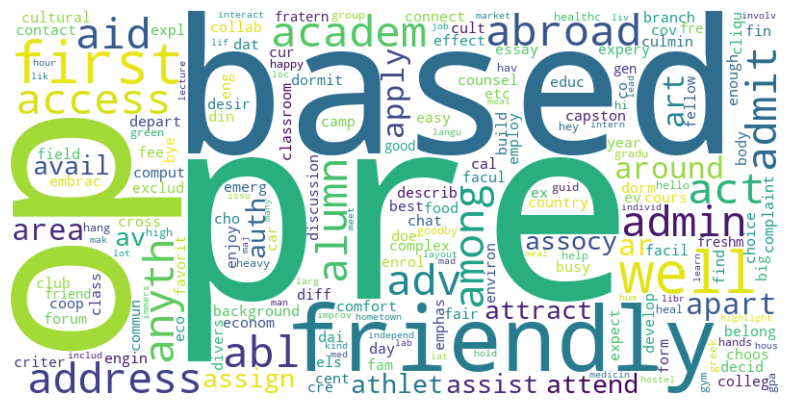

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your existing code for preprocessing without stemming
ignore_words = ['?', '_', '!', '-']
words = [w.lower() for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

# Assuming 'documents' is a list of strings containing your text data

# Combine all words into a single string
text = " ".join(words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [8]:
from nltk import ngrams
from collections import Counter

In [9]:
#generating bigram
n = 2  
bigrams = ngrams(words, n)
# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)

# Print the bigram frequencies
for bigram, count in bigram_counts.items():
    print(f"{bigram}: {count} times")


('abl', 'abroad'): 1 times
('abroad', 'academ'): 1 times
('academ', 'access'): 1 times
('access', 'act'): 1 times
('act', 'address'): 1 times
('address', 'admin'): 1 times
('admin', 'admit'): 1 times
('admit', 'adv'): 1 times
('adv', 'aid'): 1 times
('aid', 'alumn'): 1 times
('alumn', 'among'): 1 times
('among', 'anyth'): 1 times
('anyth', 'apart'): 1 times
('apart', 'apply'): 1 times
('apply', 'ar'): 1 times
('ar', 'area'): 1 times
('area', 'around'): 1 times
('around', 'art'): 1 times
('art', 'assign'): 1 times
('assign', 'assist'): 1 times
('assist', 'assocy'): 1 times
('assocy', 'athlet'): 1 times
('athlet', 'attend'): 1 times
('attend', 'attract'): 1 times
('attract', 'auth'): 1 times
('auth', 'av'): 1 times
('av', 'avail'): 1 times
('avail', 'background'): 1 times
('background', 'belong'): 1 times
('belong', 'best'): 1 times
('best', 'big'): 1 times
('big', 'body'): 1 times
('body', 'branch'): 1 times
('branch', 'build'): 1 times
('build', 'busy'): 1 times
('busy', 'bye'): 1 time

In [10]:
print("Creating the Data for our Model.....")
training = []
output = []
print("Creating an List (Empty) for Output.....")
output_empty = [0] * len(classes)

print("Creating Traning Set, Bag of Words for our Model....")
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])


Creating the Data for our Model.....
Creating an List (Empty) for Output.....
Creating Traning Set, Bag of Words for our Model....


In [11]:
print("Shuffling Randomly and Converting into Numpy Array for Faster Processing......")
random.shuffle(training)
training = np.array(training)

print("Creating Training list")
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Building Neural Network for Out Chatbot to be Contextual....")
print("Resetting graph data....")
tf.reset_default_graph()

Shuffling Randomly and Converting into Numpy Array for Faster Processing......
Creating Training list
Building Neural Network for Out Chatbot to be Contextual....
Resetting graph data....


In [12]:
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)
print("Training....")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Training....


In [13]:
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')

In [14]:

print("Here i am using stochiastic Gradient Descent ALgorithm")
model_filename = 'model.tflearn'
print("Training the model...")
# Assuming you have 'train_x' and 'train_y' defined
model.fit(train_x, train_y, n_epoch=1000, batch_size=8, show_metric=True)
print("Saving the trained model...")
model.save(model_filename)
print("Model saved successfully!")

Training Step: 36999  | total loss: 0.02900 | time: 0.073s
| Adam | epoch: 1000 | loss: 0.02900 - acc: 0.9805 -- iter: 288/292
Training Step: 37000  | total loss: 0.02615 | time: 0.081s
| Adam | epoch: 1000 | loss: 0.02615 - acc: 0.9824 -- iter: 292/292
--
Saving the trained model...
INFO:tensorflow:c:\Users\psund\Documents\chatbot intents - Copy\chatbot intents - Copy\model.tflearn is not in all_model_checkpoint_paths. Manually adding it.
Model saved successfully!


In [15]:
from sklearn.model_selection import train_test_split

# Assuming you have 'train_x' and 'train_y' defined
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Assuming you have a fresh model instance created and compiled
# model = ...

print("Training on the train_test_split data...")
model.fit(X_train, y_train, n_epoch=1000, batch_size=8, show_metric=True, validation_set=(X_test, y_test))

print("Saving the trained model...")
model.save(model_filename)
print("Model saved successfully!")

Training Step: 66999  | total loss: 0.00314 | time: 0.110s
| Adam | epoch: 2000 | loss: 0.00314 - acc: 0.9958 -- iter: 232/233
Training Step: 67000  | total loss: 0.00283 | time: 1.139s
| Adam | epoch: 2000 | loss: 0.00283 - acc: 0.9962 | val_loss: 1.82458 - val_acc: 0.7797 -- iter: 233/233
--
Saving the trained model...
INFO:tensorflow:c:\Users\psund\Documents\chatbot intents - Copy\chatbot intents - Copy\model.tflearn is not in all_model_checkpoint_paths. Manually adding it.
Model saved successfully!


In [16]:
print("Pickle is also Saved..........")
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))
pickle.dump( {'words':words, 'classes':classes, 'train_x':train_x, 'train_y':train_y}, open( "training_data", "wb" ) )

Pickle is also Saved..........


In [17]:
print("Loading Pickle.....")
data = pickle.load( open( "training_data", "rb" ) )
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']


with open('intents.json') as json_data:
    intents = json.load(json_data)
    
#print("Loading the Model......")
#model.load("./model.tflearn")

Loading Pickle.....


In [18]:
def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.8
print("ERROR_THRESHOLD = 0.8")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                # Tag Finding
                if i['tag'] == results[0][0]:
                    # Random Response from High Order Probabilities
                    return print(random.choice(i['responses']))

            results.pop(0)

ERROR_THRESHOLD = 0.8


# sample GUI for the chatbot

In [19]:
project = model.load("./model.tflearn")

intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

def clean_up_sentence(sentence):
    # It Tokenize or Break it into the constituents parts of Sentense.
    sentence_words = nltk.word_tokenize(sentence)
    # Stemming means to find the root of the word.
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# Return the Array of Bag of Words: True or False and 0 or 1 for each word of bag that exists in the Sentence
def bow(sentence, words, show_details=False):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

ERROR_THRESHOLD = 0.8
print("ERROR_THRESHOLD = 0.8")

def classify(sentence):
    # Prediction or To Get the Posibility or Probability from the Model
    results = model.predict([bow(sentence, words)])[0]
    # Exclude those results which are Below Threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # Sorting is Done because heigher Confidence Answer comes first.
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1])) #Tuppl -> Intent and Probability
    return return_list

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    # That Means if Classification is Done then Find the Matching Tag.
    if results:
        # Long Loop to get the Result.
        while results:
            for i in intents['intents']:
                # Tag Finding
                if i['tag'] == results[0][0]:
                    # Random Response from High Order Probabilities
                    return random.choice(i['responses'])

            results.pop(0)           
            
#Creating GUI with tkinter
import tkinter
from tkinter import *

def send(event=None):
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    
    if msg == 'quit':
        base.destroy()  # exit the program if the user entered "quit"
    elif msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#333333", font=("Arial", 14))
    
        res = response(msg)
        if res is not None:
            ChatLog.insert(END, "Bot: " + res + '\n\n')
            
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)


base = Tk()
base.title("Chatbot")
base.geometry("1300x575")
base.configure(bg="#444444")
base.resizable(width=False, height=False)

#Create Chat window
ChatLog = Text(base, bd=0, bg="#ffffff", height="10", width="60", font=("Arial", 14),)

ChatLog.config(state=DISABLED)

#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="hand2")
ChatLog['yscrollcommand'] = scrollbar.set

#Create Button to send message
SendButton = Button(base, font=("Arial",16), text="Send", width="10", height=3,
                    bd=0, bg="#0080ff", activebackground="#0059b3",fg='#ffffff',
                    command=send)

#Create the box to enter message
EntryBox = Text(base, bd=0, bg="#ffffff", width="40", height="4", font=("Arial", 14))
EntryBox.bind("<Return>", send)  # bind the "Enter" key to the send function

#Place all components on the screen
ChatLog.place(x=20,y=20, height=420, width=1250)
scrollbar.place(x=1250, y=20, height=420)
EntryBox.place(x=20, y=460, height=100, width=1100)
SendButton.place(x=1149, y=457, height=100)

base.mainloop()


INFO:tensorflow:Restoring parameters from c:\Users\psund\Documents\chatbot intents - Copy\chatbot intents - Copy\model.tflearn


ERROR_THRESHOLD = 0.8


In [ ]:
'''import tkinter
from tkinter import *
import nltk
import tflearn
import json
import pickle
import random
import numpy as np

# Load your trained model, intents, words, and classes
model = tflearn.DNN(net_lstm, tensorboard_dir='tflearn_logs_lstm')
model.load("./model.tflearn")

intents = json.loads(open('intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

# Your other functions

def response(sentence, userID='123', show_details=False):
    results = classify(sentence)

    # If there are classification results
    if results:
        # Loop through the results
        for i in intents['intents']:
            # Check if the tag matches the highest probability result
            if i['tag'] == results[0][0]:
                # Return a random response from the matched intent
                return random.choice(i['responses'])

    # If no classification results or matching tag is found
    return "Sorry, I do not have that information."

# Create GUI with tkinter
base = Tk()
base.title("Chatbot")
base.geometry("1300x575")
base.configure(bg="#444444")
base.resizable(width=False, height=False)

# Create Chat window
ChatLog = Text(base, bd=0, bg="#ffffff", height="10", width="60", font=("Arial", 14),)

ChatLog.config(state=DISABLED)

# Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="hand2")
ChatLog['yscrollcommand'] = scrollbar.set

# Create Button to send message
SendButton = Button(base, font=("Arial",16), text="Send", width="10", height=3,
                    bd=0, bg="#0080ff", activebackground="#0059b3",fg='#ffffff',
                    command=send)

# Create the box to enter message
EntryBox = Text(base, bd=0, bg="#ffffff", width="40", height="4", font=("Arial", 14))
EntryBox.bind("<Return>", send)  # bind the "Enter" key to the send function

def send(event=None):
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    
    if msg.lower() == 'quit':
        base.destroy()  # exit the program if the user entered "quit"
    elif msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#333333", font=("Arial", 14))
    
        res = response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')
            
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)
        
        # If the response is the default "Sorry, I do not have that information."
        if res == "Sorry, I do not have that information.":
            ChatLog.insert(END, "Bot: " + res + '\n\n')

# Place all components on the screen
ChatLog.place(x=20, y=20, height=420, width=1250)
scrollbar.place(x=1250, y=20, height=420)
EntryBox.place(x=20, y=460, height=100, width=1100)
SendButton.place(x=1149, y=457, height=100)

base.mainloop()'''

In [ ]:
import speech_recognition as sr
import pyttsx3

def speak(text):
    # Initialize the text-to-speech engine
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

# Initialize the recognizer
recognizer = sr.Recognizer()

# Use the microphone as the audio source
with sr.Microphone() as source:
    print("Say something:")
    # Adjust for ambient noise
    recognizer.adjust_for_ambient_noise(source)
    
    # Listen to the audio input
    audio = recognizer.listen(source)

    print("Recognizing...")

    try:
        # Use the Google Web Speech API to convert speech to text
        text = recognizer.recognize_google(audio)
        print(f"Text: {text}")
        speak(text)

    except sr.UnknownValueError:
        print("Google Web Speech API could not understand the audio.")

    except sr.RequestError as e:
        print(f"Could not request results from Google Web Speech API; {e}")


Say something:
Recognizing...
Google Web Speech API could not understand the audio.
